![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# FINAL PROJECT

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Final_project/DSF_FINAL_PROJECT.ipynb)

# Regarding the final project for the class

The final project for the class will need to draw from everything you have covered in class, at least everything relevant for your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using code from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

# 1.- Ingesting, exploring and cleaning data for your project

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import matplotlib.pyplot as plt
import os
import pathlib
import PIL
import glob
import tensorflow as tf

In [14]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/fruits-360'
train_dir = os.path.join(base_dir, 'Training/')
train_dir_pathlib = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/fruits-360/Training/")
train_dir_pathlib

PosixPath('/content/drive/MyDrive/Colab Notebooks/fruits-360/Training')

In [33]:
# Total COunt of Images in Training set
len(list(train_dir_pathlib.glob("*/*.jpg")))

17750

In [39]:
fruits = list(train_dir_pathlib.glob("Apricot*.jpg"))
fruits[:2]

[]

IndexError: ignored

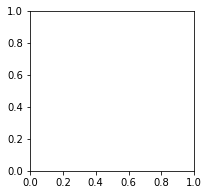

In [40]:
plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

In [18]:
batch_size = 32
img_height = 100
img_width = 100

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_pathlib,
    validation_split = 0.2,
    subset = 'training',
    seed = 99,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 15043 files belonging to 131 classes.
Using 12035 files for training.


In [22]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_pathlib,
    validation_split = 0.2,
    subset = 'validation',
    seed = 99,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 15252 files belonging to 131 classes.
Using 3050 files for validation.


In [23]:
class_names = train_ds.class_names
num_class = len(class_names)

In [25]:
num_class

131

In [24]:
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

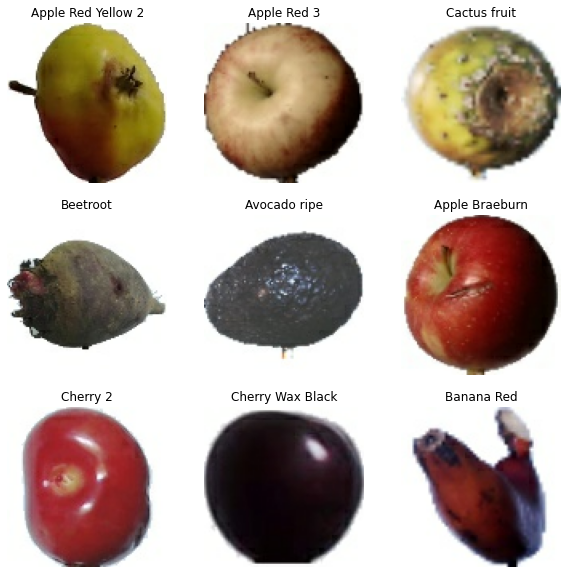

In [26]:
for images, labels in train_ds.take(1):
    plt.figure(figsize = (10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show() 

# 2.- Choosing/testing of algorithm approach

In [27]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [28]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ]
)

In [29]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [30]:
base_model = tf.keras.applications.resnet.ResNet50(
    input_shape = (img_height, img_width, 3),
    include_top = False,
    weights = 'imagenet'
)

94773248/94765736 [==============================] - 2s 0us/step


In [31]:
base_model.trainable = False

In [32]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_class)

## Building the Model

In [34]:
inputs = tf.keras.Input(shape = (100,100,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training = False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [36]:
model.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [37]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 100, 100, 3)       0         
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 100, 100, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd (TensorF [(None, 100, 100, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)             

## Train the Model

In [38]:
model.evaluate(validation_ds)

96/96 [==============================] - 1899s 20s/step - loss: 6.2880 - accuracy: 0.0020


[6.287977695465088, 0.0019672131165862083]

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    epochs = epochs,
    validation_data = validation_ds
)

Epoch 1/10


# 3.-Visualizing the results

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (12,10))

plt.plot(epochs_range, train_loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')

plt.legend(loc = 'upper left')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
np.argmin(val_loss)

# 4.-Packaging the project into a product

In [ ]:
model.save("tf_resnet_model_v1.h5") #using h5 extension
print("model saved!!!")